In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import io 
from PIL import Image 

In [2]:
demo_fruitnut = pd.read_csv('../data/fruittreenuttotals_demographics.csv')
demo_berries = pd.read_csv('../data/demographics_berries.csv')
demo_citrus = pd.read_csv('../data/demographics_citrus.csv')
demo_vegetables = pd.read_csv('../data/demographics_vegetables.csv')

In [3]:
berry_org_types = demo_berries.loc[(demo_berries['Domain'] == 'ORGANIZATION') & (demo_berries['Data Item'] == 'BERRY TOTALS - OPERATIONS WITH SALES')]
berry_org_types

,Program,Year,Period,Week Ending,Geo Level,State,State ANSI,Ag District,Ag District Code,County,...,Zip Code,Region,watershed_code,Watershed,Commodity,Data Item,Domain,Domain Category,Value,CV (%)
32,CENSUS,2022,YEAR,NaN,NATIONAL,US TOTAL,NaN,NaN,NaN,NaN,...,NaN,NaN,0,NaN,BERRY TOTALS,BERRY TOTALS - OPERATIONS WITH SALES,ORGANIZATION,"ORGANIZATION: (TAX PURPOSES, CORPORATION)","3,977",5.7
33,CENSUS,2022,YEAR,NaN,NATIONAL,US TOTAL,NaN,NaN,NaN,NaN,...,NaN,NaN,0,NaN,BERRY TOTALS,BERRY TOTALS - OPERATIONS WITH SALES,ORGANIZATION,"ORGANIZATION: (TAX PURPOSES, CORPORATION, (EXC...",661,6.5
34,CENSUS,2022,YEAR,NaN,NATIONAL,US TOTAL,NaN,NaN,NaN,NaN,...,NaN,NaN,0,NaN,BERRY TOTALS,BERRY TOTALS - OPERATIONS WITH SALES,ORGANIZATION,"ORGANIZATION: (TAX PURPOSES, CORPORATION, (EXC...",633,6.7
35,CENSUS,2022,YEAR,NaN,NATIONAL,US TOTAL,NaN,NaN,NaN,NaN,...,NaN,NaN,0,NaN,BERRY TOTALS,BERRY TOTALS - OPERATIONS WITH SALES,ORGANIZATION,"ORGANIZATION: (TAX PURPOSES, CORPORATION, FAMI...","3,316",6.0
36,CENSUS,2022,YEAR,NaN,NATIONAL,US TOTAL,NaN,NaN,NaN,NaN,...,NaN,NaN,0,NaN,BERRY TOTALS,BERRY TOTALS - OPERATIONS WITH SALES,ORGANIZATION,"ORGANIZATION: (TAX PURPOSES, CORPORATION, FAMI...","3,252",6.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18728,CENSUS,2012,YEAR,NaN,STATE,WISCONSIN,55.0,NaN,NaN,NaN,...,NaN,NaN,0,NaN,BERRY TOTALS,BERRY TOTALS - OPERATIONS WITH SALES,ORGANIZATION,"ORGANIZATION: (TAX PURPOSES, PARTNERSHIP, REGI...",70,8.0
18891,CENSUS,2012,YEAR,NaN,STATE,WYOMING,56.0,NaN,NaN,NaN,...,NaN,NaN,0,NaN,BERRY TOTALS,BERRY TOTALS - OPERATIONS WITH SALES,ORGANIZATION,"ORGANIZATION: (TAX PURPOSES, CORPORATION)",2,94.9
18892,CENSUS,2012,YEAR,NaN,STATE,WYOMING,56.0,NaN,NaN,NaN,...,NaN,NaN,0,NaN,BERRY TOTALS,BERRY TOTALS - OPERATIONS WITH SALES,ORGANIZATION,"ORGANIZATION: (TAX PURPOSES, CORPORATION, FAMI...",2,94.9
18893,CENSUS,2012,YEAR,NaN,STATE,WYOMING,56.0,NaN,NaN,NaN,...,NaN,NaN,0,NaN,BERRY TOTALS,BERRY TOTALS - OPERATIONS WITH SALES,ORGANIZATION,"ORGANIZATION: (TAX PURPOSES, CORPORATION, FAMI...",2,94.9


In [4]:
berry_org_types.to_csv(path_or_buf = 'berry_org_types.csv', index = False)

In [5]:
veg_org_types = demo_vegetables.loc[(demo_vegetables['Domain'] == 'ORGANIZATION') & (demo_vegetables['Data Item'] == 'VEGETABLE TOTALS, INCL SEEDS & TRANSPLANTS, IN THE OPEN - OPERATIONS WITH SALES')]
veg_org_types.to_csv(path_or_buf = 'veg_org_types.csv', index = False)

In [6]:
demo_vegetables['Data Item'].loc[(demo_vegetables['Domain'] == 'ORGANIZATION')].unique()

array(['VEGETABLE TOTALS, IN THE OPEN - ACRES IN PRODUCTION',
       'VEGETABLE TOTALS, IN THE OPEN - OPERATIONS WITH AREA IN PRODUCTION',
       'VEGETABLE TOTALS, IN THE OPEN, IRRIGATED - ACRES IN PRODUCTION',
       'VEGETABLE TOTALS, IN THE OPEN, IRRIGATED - OPERATIONS WITH AREA IN PRODUCTION',
       'VEGETABLE TOTALS, INCL SEEDS & TRANSPLANTS, IN THE OPEN - OPERATIONS WITH SALES',
       'VEGETABLE TOTALS, INCL SEEDS & TRANSPLANTS, IN THE OPEN - SALES, MEASURED IN $'],
      dtype=object)

In [7]:
demo_vegetables['Domain Category'].loc[(demo_vegetables['Domain'] == 'ORGANIZATION')].unique()

array(['ORGANIZATION: (TAX PURPOSES, CORPORATION)',
       'ORGANIZATION: (TAX PURPOSES, CORPORATION, (EXCL FAMILY HELD))',
       'ORGANIZATION: (TAX PURPOSES, CORPORATION, (EXCL FAMILY HELD), LE 10 STOCKHOLDERS)',
       'ORGANIZATION: (TAX PURPOSES, CORPORATION, FAMILY HELD)',
       'ORGANIZATION: (TAX PURPOSES, CORPORATION, FAMILY HELD, LE 10 STOCKHOLDERS)',
       'ORGANIZATION: (TAX PURPOSES, FAMILY & INDIVIDUAL)',
       'ORGANIZATION: (TAX PURPOSES, INSTITUTIONAL & RESEARCH & RESERVATION & OTHER)',
       'ORGANIZATION: (TAX PURPOSES, PARTNERSHIP)',
       'ORGANIZATION: (TAX PURPOSES, PARTNERSHIP, REGISTERED UNDER STATE LAW)'],
      dtype=object)

In [8]:
demo_vegetables = demo_vegetables.loc[demo_vegetables['Value'] != ' (D)']
demo_vegetables = demo_vegetables.loc[demo_vegetables['Value'] != ' (Z)']
demo_vegetables['Value'] = demo_vegetables['Value'].str.replace(',', '')
demo_vegetables['Value'] = pd.to_numeric(demo_vegetables.Value, downcast='integer').fillna(0)
demo_vegetables

,Program,Year,Period,Week Ending,Geo Level,State,State ANSI,Ag District,Ag District Code,County,...,Zip Code,Region,watershed_code,Watershed,Commodity,Data Item,Domain,Domain Category,Value,CV (%)
0,CENSUS,2022,YEAR,NaN,NATIONAL,US TOTAL,NaN,NaN,NaN,NaN,...,NaN,NaN,0,NaN,VEGETABLE TOTALS,"VEGETABLE TOTALS, IN THE OPEN - ACRES HARVESTED",PRODUCERS,PRODUCERS: (ETHNICITY = HISPANIC),545756,9.8
1,CENSUS,2022,YEAR,NaN,NATIONAL,US TOTAL,NaN,NaN,NaN,NaN,...,NaN,NaN,0,NaN,VEGETABLE TOTALS,"VEGETABLE TOTALS, IN THE OPEN - ACRES HARVESTED",PRODUCERS,"PRODUCERS: (RACE = ASIAN, ALONE OR COMBINED WI...",154666,24.2
2,CENSUS,2022,YEAR,NaN,NATIONAL,US TOTAL,NaN,NaN,NaN,NaN,...,NaN,NaN,0,NaN,VEGETABLE TOTALS,"VEGETABLE TOTALS, IN THE OPEN - ACRES IN PRODU...",ORGANIZATION,"ORGANIZATION: (TAX PURPOSES, CORPORATION)",1699850,8.3
3,CENSUS,2022,YEAR,NaN,NATIONAL,US TOTAL,NaN,NaN,NaN,NaN,...,NaN,NaN,0,NaN,VEGETABLE TOTALS,"VEGETABLE TOTALS, IN THE OPEN - ACRES IN PRODU...",ORGANIZATION,"ORGANIZATION: (TAX PURPOSES, CORPORATION, (EXC...",248133,8.4
4,CENSUS,2022,YEAR,NaN,NATIONAL,US TOTAL,NaN,NaN,NaN,NaN,...,NaN,NaN,0,NaN,VEGETABLE TOTALS,"VEGETABLE TOTALS, IN THE OPEN - ACRES IN PRODU...",ORGANIZATION,"ORGANIZATION: (TAX PURPOSES, CORPORATION, (EXC...",166755,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48214,CENSUS,2012,YEAR,NaN,STATE,WYOMING,56.0,NaN,NaN,NaN,...,NaN,NaN,0,NaN,VEGETABLE TOTALS,"VEGETABLE TOTALS, INCL SEEDS & TRANSPLANTS, IN...",ORGANIZATION AND SALES,"ORGANIZATION: (TAX PURPOSES, PARTNERSHIP) AND ...",3013000,46.6
48215,CENSUS,2012,YEAR,NaN,STATE,WYOMING,56.0,NaN,NaN,NaN,...,NaN,NaN,0,NaN,VEGETABLE TOTALS,"VEGETABLE TOTALS, INCL SEEDS & TRANSPLANTS, IN...",ORGANIZATION AND SALES,"ORGANIZATION: (TAX PURPOSES, PARTNERSHIP, REGI...",3013000,46.6
48216,CENSUS,2012,YEAR,NaN,STATE,WYOMING,56.0,NaN,NaN,NaN,...,NaN,NaN,0,NaN,VEGETABLE TOTALS,"VEGETABLE TOTALS, INCL SEEDS & TRANSPLANTS, IN...",TENURE,TENURE: (FULL OWNER),166000,29.1
48225,CENSUS,2012,YEAR,NaN,STATE,WYOMING,56.0,NaN,NaN,NaN,...,NaN,NaN,0,NaN,VEGETABLE TOTALS,"VEGETABLE TOTALS, INCL SEEDS & TRANSPLANTS, IN...",TYPOLOGY,"TYPOLOGY: (FAMILY FARMS, GCFI (LESS THAN 150,0...",109000,32.7


In [9]:
demo_vegetables.loc[(demo_vegetables['Domain'] == 'ORGANIZATION')
                & (demo_vegetables['Data Item'] == 'VEGETABLE TOTALS, IN THE OPEN - ACRES IN PRODUCTION')]

,Program,Year,Period,Week Ending,Geo Level,State,State ANSI,Ag District,Ag District Code,County,...,Zip Code,Region,watershed_code,Watershed,Commodity,Data Item,Domain,Domain Category,Value,CV (%)
2,CENSUS,2022,YEAR,NaN,NATIONAL,US TOTAL,NaN,NaN,NaN,NaN,...,NaN,NaN,0,NaN,VEGETABLE TOTALS,"VEGETABLE TOTALS, IN THE OPEN - ACRES IN PRODU...",ORGANIZATION,"ORGANIZATION: (TAX PURPOSES, CORPORATION)",1699850,8.3
3,CENSUS,2022,YEAR,NaN,NATIONAL,US TOTAL,NaN,NaN,NaN,NaN,...,NaN,NaN,0,NaN,VEGETABLE TOTALS,"VEGETABLE TOTALS, IN THE OPEN - ACRES IN PRODU...",ORGANIZATION,"ORGANIZATION: (TAX PURPOSES, CORPORATION, (EXC...",248133,8.4
4,CENSUS,2022,YEAR,NaN,NATIONAL,US TOTAL,NaN,NaN,NaN,NaN,...,NaN,NaN,0,NaN,VEGETABLE TOTALS,"VEGETABLE TOTALS, IN THE OPEN - ACRES IN PRODU...",ORGANIZATION,"ORGANIZATION: (TAX PURPOSES, CORPORATION, (EXC...",166755,3.0
5,CENSUS,2022,YEAR,NaN,NATIONAL,US TOTAL,NaN,NaN,NaN,NaN,...,NaN,NaN,0,NaN,VEGETABLE TOTALS,"VEGETABLE TOTALS, IN THE OPEN - ACRES IN PRODU...",ORGANIZATION,"ORGANIZATION: (TAX PURPOSES, CORPORATION, FAMI...",1451717,8.7
6,CENSUS,2022,YEAR,NaN,NATIONAL,US TOTAL,NaN,NaN,NaN,NaN,...,NaN,NaN,0,NaN,VEGETABLE TOTALS,"VEGETABLE TOTALS, IN THE OPEN - ACRES IN PRODU...",ORGANIZATION,"ORGANIZATION: (TAX PURPOSES, CORPORATION, FAMI...",1383908,9.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47436,CENSUS,2012,YEAR,NaN,STATE,WISCONSIN,55.0,NaN,NaN,NaN,...,NaN,NaN,0,NaN,VEGETABLE TOTALS,"VEGETABLE TOTALS, IN THE OPEN - ACRES IN PRODU...",ORGANIZATION,"ORGANIZATION: (TAX PURPOSES, INSTITUTIONAL & R...",1646,3.9
47437,CENSUS,2012,YEAR,NaN,STATE,WISCONSIN,55.0,NaN,NaN,NaN,...,NaN,NaN,0,NaN,VEGETABLE TOTALS,"VEGETABLE TOTALS, IN THE OPEN - ACRES IN PRODU...",ORGANIZATION,"ORGANIZATION: (TAX PURPOSES, PARTNERSHIP)",50199,1.1
47438,CENSUS,2012,YEAR,NaN,STATE,WISCONSIN,55.0,NaN,NaN,NaN,...,NaN,NaN,0,NaN,VEGETABLE TOTALS,"VEGETABLE TOTALS, IN THE OPEN - ACRES IN PRODU...",ORGANIZATION,"ORGANIZATION: (TAX PURPOSES, PARTNERSHIP, REGI...",47251,1.5
47939,CENSUS,2012,YEAR,NaN,STATE,WYOMING,56.0,NaN,NaN,NaN,...,NaN,NaN,0,NaN,VEGETABLE TOTALS,"VEGETABLE TOTALS, IN THE OPEN - ACRES IN PRODU...",ORGANIZATION,"ORGANIZATION: (TAX PURPOSES, FAMILY & INDIVIDUAL)",60,49.6


In [10]:
demo_vegetables['Domain Category'] = demo_vegetables['Domain Category'].str[28:-1]

In [11]:
demo_vegetables_area = demo_vegetables.loc[(demo_vegetables['Domain'] == 'ORGANIZATION')
                & (demo_vegetables['Data Item'] == 'VEGETABLE TOTALS, IN THE OPEN - ACRES IN PRODUCTION')].groupby(
                ['Year', 'Domain Category']).sum(
                'Value').fillna(0).reset_index()
demo_vegetables_area

,Year,Domain Category,Week Ending,State ANSI,Ag District,Ag District Code,County,County ANSI,Zip Code,Region,watershed_code,Watershed,Value
0,2012,CORPORATION,0.0,1118.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,3164931
1,2012,"CORPORATION, (EXCL FAMILY HELD)",0.0,1004.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,498797
2,2012,"CORPORATION, (EXCL FAMILY HELD), LE 10 STOCKH...",0.0,726.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,301922
3,2012,"CORPORATION, FAMILY HELD",0.0,1252.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,2696100
4,2012,"CORPORATION, FAMILY HELD, LE 10 STOCKHOLDERS",0.0,702.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,1972178
5,2012,FAMILY & INDIVIDUAL,0.0,1367.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,2627411
6,2012,INSTITUTIONAL & RESEARCH & RESERVATION & OTHER,0.0,1115.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,114693
7,2012,PARTNERSHIP,0.0,1379.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,2213557
8,2012,"PARTNERSHIP, REGISTERED UNDER STATE LAW",0.0,1329.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,2064672
9,2017,CORPORATION,0.0,1235.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,2972257


In [12]:
demo_vegetables_area = demo_vegetables_area.pivot(index = 'Year', columns = 'Domain Category', values = 'Value').reset_index()

In [13]:
demo_vegetables_area

Domain Category,Year,CORPORATION,"CORPORATION, (EXCL FAMILY HELD)","CORPORATION, (EXCL FAMILY HELD), LE 10 STOCKHOLDERS","CORPORATION, FAMILY HELD","CORPORATION, FAMILY HELD, LE 10 STOCKHOLDERS",FAMILY & INDIVIDUAL,INSTITUTIONAL & RESEARCH & RESERVATION & OTHER,PARTNERSHIP,"PARTNERSHIP, REGISTERED UNDER STATE LAW"
0,2012,3164931,498797,301922,2696100,1972178,2627411,114693,2213557,2064672
1,2017,2972257,367022,211005,2646773,2071364,2355632,182041,2341230,2055567
2,2022,3365448,485222,286542,2874266,2302794,2120181,64997,2267112,2010058


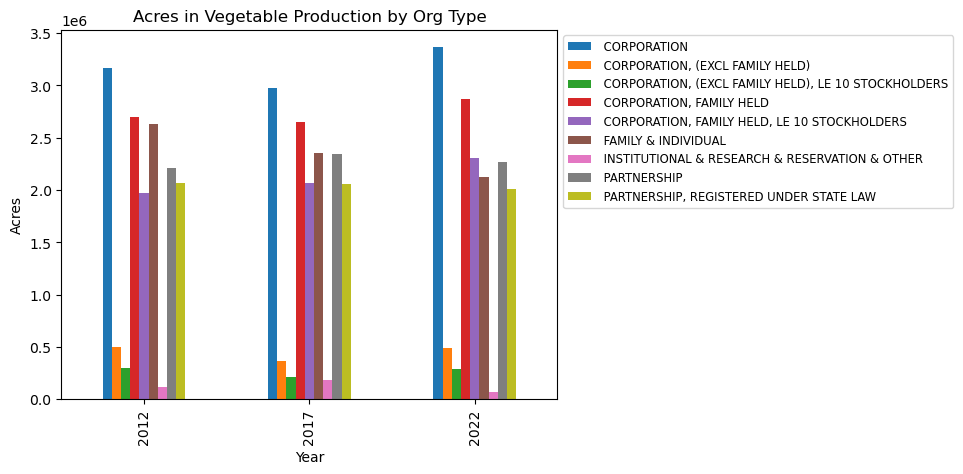

In [14]:
demo_vegetables_area_graph = demo_vegetables_area.plot(x = 'Year', y = list(
    demo_vegetables['Domain Category'].loc[(demo_vegetables['Domain'] == 'ORGANIZATION')].unique()), 
                                            kind = "bar", title = "Acres in Vegetable Production by Org Type",
                                                      ylabel = "Acres").legend(
    bbox_to_anchor = (1.0,1.0),
    fontsize = 'small').get_figure()
demo_vegetables_area_graph.savefig('demo_vegetables_area_graph.png', transparent=True, bbox_inches='tight')

In [15]:
demo_berries = demo_berries.loc[demo_berries['Value'] != ' (D)']
demo_berries = demo_berries.loc[demo_berries['Value'] != ' (Z)']
demo_berries['Value'] = demo_berries['Value'].str.replace(',', '')
demo_berries['Value'] = pd.to_numeric(demo_berries.Value, downcast='integer').fillna(0)
demo_berries

,Program,Year,Period,Week Ending,Geo Level,State,State ANSI,Ag District,Ag District Code,County,...,Zip Code,Region,watershed_code,Watershed,Commodity,Data Item,Domain,Domain Category,Value,CV (%)
0,CENSUS,2022,YEAR,NaN,NATIONAL,US TOTAL,NaN,NaN,NaN,NaN,...,NaN,NaN,0,NaN,BERRY TOTALS,BERRY TOTALS - ACRES GROWN,ORGANIZATION,"ORGANIZATION: (TAX PURPOSES, CORPORATION)",157890,7.8
1,CENSUS,2022,YEAR,NaN,NATIONAL,US TOTAL,NaN,NaN,NaN,NaN,...,NaN,NaN,0,NaN,BERRY TOTALS,BERRY TOTALS - ACRES GROWN,ORGANIZATION,"ORGANIZATION: (TAX PURPOSES, CORPORATION, (EXC...",21026,10.3
2,CENSUS,2022,YEAR,NaN,NATIONAL,US TOTAL,NaN,NaN,NaN,NaN,...,NaN,NaN,0,NaN,BERRY TOTALS,BERRY TOTALS - ACRES GROWN,ORGANIZATION,"ORGANIZATION: (TAX PURPOSES, CORPORATION, (EXC...",19316,11.1
3,CENSUS,2022,YEAR,NaN,NATIONAL,US TOTAL,NaN,NaN,NaN,NaN,...,NaN,NaN,0,NaN,BERRY TOTALS,BERRY TOTALS - ACRES GROWN,ORGANIZATION,"ORGANIZATION: (TAX PURPOSES, CORPORATION, FAMI...",136865,8.2
4,CENSUS,2022,YEAR,NaN,NATIONAL,US TOTAL,NaN,NaN,NaN,NaN,...,NaN,NaN,0,NaN,BERRY TOTALS,BERRY TOTALS - ACRES GROWN,ORGANIZATION,"ORGANIZATION: (TAX PURPOSES, CORPORATION, FAMI...",121622,9.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18898,CENSUS,2012,YEAR,NaN,STATE,WYOMING,56.0,NaN,NaN,NaN,...,NaN,NaN,0,NaN,BERRY TOTALS,BERRY TOTALS - OPERATIONS WITH SALES,TYPOLOGY,"TYPOLOGY: (FAMILY FARMS, GCFI (LESS THAN 150,0...",2,48.6
18899,CENSUS,2012,YEAR,NaN,STATE,WYOMING,56.0,NaN,NaN,NaN,...,NaN,NaN,0,NaN,BERRY TOTALS,BERRY TOTALS - OPERATIONS WITH SALES,TYPOLOGY,"TYPOLOGY: (FAMILY FARMS, GCFI (LESS THAN 350,0...",2,94.9
18900,CENSUS,2012,YEAR,NaN,STATE,WYOMING,56.0,NaN,NaN,NaN,...,NaN,NaN,0,NaN,BERRY TOTALS,BERRY TOTALS - OPERATIONS WITH SALES,TYPOLOGY,"TYPOLOGY: (FAMILY FARMS, GCFI (LESS THAN 350,0...",3,63.2
18901,CENSUS,2012,YEAR,NaN,STATE,WYOMING,56.0,NaN,NaN,NaN,...,NaN,NaN,0,NaN,BERRY TOTALS,"BERRY TOTALS - SALES, MEASURED IN $",OPERATORS,OPERATORS: (1 OPERATORS),2000,39.5


In [16]:
demo_berries['Data Item'].loc[(demo_berries['Domain'] == 'ORGANIZATION')].unique()

array(['BERRY TOTALS - ACRES GROWN',
       'BERRY TOTALS - OPERATIONS WITH AREA GROWN',
       'BERRY TOTALS - OPERATIONS WITH SALES',
       'BERRY TOTALS - SALES, MEASURED IN $'], dtype=object)

In [17]:
demo_berries['Domain Category'] = demo_berries['Domain Category'].str[28:-1]

In [18]:
demo_berries_area = demo_berries.loc[(demo_berries['Domain'] == 'ORGANIZATION')
                & (demo_berries['Data Item'] == 'BERRY TOTALS - ACRES GROWN')].groupby(
                ['Year', 'Domain Category']).sum(
                'Value').fillna(0).reset_index()
demo_berries_area

,Year,Domain Category,Week Ending,State ANSI,Ag District,Ag District Code,County,County ANSI,Zip Code,Region,watershed_code,Watershed,Value
0,2012,CORPORATION,0.0,1048.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,233130
1,2012,"CORPORATION, (EXCL FAMILY HELD)",0.0,729.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,29096
2,2012,"CORPORATION, (EXCL FAMILY HELD), LE 10 STOCKH...",0.0,508.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,18977
3,2012,"CORPORATION, FAMILY HELD",0.0,1199.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,237131
4,2012,"CORPORATION, FAMILY HELD, LE 10 STOCKHOLDERS",0.0,773.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,186258
5,2012,FAMILY & INDIVIDUAL,0.0,1391.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,205117
6,2012,INSTITUTIONAL & RESEARCH & RESERVATION & OTHER,0.0,836.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,15280
7,2012,PARTNERSHIP,0.0,993.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,84798
8,2012,"PARTNERSHIP, REGISTERED UNDER STATE LAW",0.0,846.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,74903
9,2017,CORPORATION,0.0,1033.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,271148


In [19]:
demo_berries_area = demo_berries_area.pivot(index = 'Year', columns = 'Domain Category', values = 'Value').reset_index()
demo_berries_area

Domain Category,Year,CORPORATION,"CORPORATION, (EXCL FAMILY HELD)","CORPORATION, (EXCL FAMILY HELD), LE 10 STOCKHOLDERS","CORPORATION, FAMILY HELD","CORPORATION, FAMILY HELD, LE 10 STOCKHOLDERS",FAMILY & INDIVIDUAL,INSTITUTIONAL & RESEARCH & RESERVATION & OTHER,PARTNERSHIP,"PARTNERSHIP, REGISTERED UNDER STATE LAW"
0,2012,233130,29096,18977,237131,186258,205117,15280,84798,74903
1,2017,271148,26755,17642,260088,191771,190847,12965,108767,91549
2,2022,315491,41899,30556,273637,157211,239432,6548,146983,97430


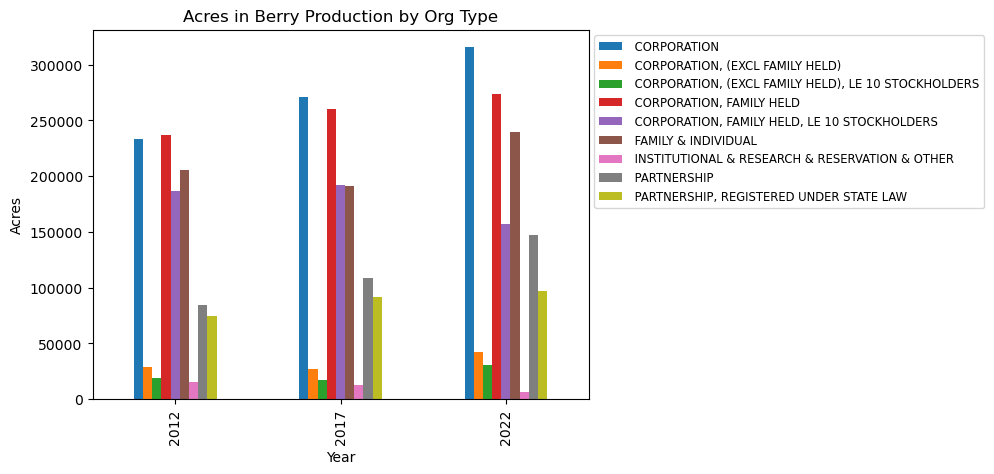

In [20]:
demo_berries_area_graph = demo_berries_area.plot(x = 'Year', y = list(
    demo_berries['Domain Category'].loc[(demo_berries['Domain'] == 'ORGANIZATION')].unique()), kind = "bar", title = "Acres in Berry Production by Org Type",
                                                ylabel = "Acres").legend(
    bbox_to_anchor = (1.0,1.0),
    fontsize = 'small').get_figure()
demo_berries_area_graph.savefig('demo_berries_area_graph.png', transparent=True, bbox_inches='tight')

In [21]:
demo_citrus = demo_citrus.loc[demo_citrus['Value'] != ' (D)']
demo_citrus = demo_citrus.loc[demo_citrus['Value'] != ' (Z)']
demo_citrus['Value'] = demo_citrus['Value'].str.replace(',', '')
demo_citrus['Value'] = pd.to_numeric(demo_citrus.Value, downcast='integer').fillna(0)
demo_citrus

,Program,Year,Period,Week Ending,Geo Level,State,State ANSI,Ag District,Ag District Code,County,...,Zip Code,Region,watershed_code,Watershed,Commodity,Data Item,Domain,Domain Category,Value,CV (%)
0,CENSUS,2022,YEAR,NaN,NATIONAL,US TOTAL,NaN,NaN,NaN,NaN,...,NaN,NaN,0,NaN,CITRUS TOTALS,CITRUS TOTALS - ACRES BEARING & NON-BEARING,ORGANIZATION,"ORGANIZATION: (TAX PURPOSES, CORPORATION)",371002,6.5
1,CENSUS,2022,YEAR,NaN,NATIONAL,US TOTAL,NaN,NaN,NaN,NaN,...,NaN,NaN,0,NaN,CITRUS TOTALS,CITRUS TOTALS - ACRES BEARING & NON-BEARING,ORGANIZATION,"ORGANIZATION: (TAX PURPOSES, CORPORATION, (EXC...",120324,7.8
2,CENSUS,2022,YEAR,NaN,NATIONAL,US TOTAL,NaN,NaN,NaN,NaN,...,NaN,NaN,0,NaN,CITRUS TOTALS,CITRUS TOTALS - ACRES BEARING & NON-BEARING,ORGANIZATION,"ORGANIZATION: (TAX PURPOSES, CORPORATION, (EXC...",60894,11.8
3,CENSUS,2022,YEAR,NaN,NATIONAL,US TOTAL,NaN,NaN,NaN,NaN,...,NaN,NaN,0,NaN,CITRUS TOTALS,CITRUS TOTALS - ACRES BEARING & NON-BEARING,ORGANIZATION,"ORGANIZATION: (TAX PURPOSES, CORPORATION, FAMI...",250677,7.7
4,CENSUS,2022,YEAR,NaN,NATIONAL,US TOTAL,NaN,NaN,NaN,NaN,...,NaN,NaN,0,NaN,CITRUS TOTALS,CITRUS TOTALS - ACRES BEARING & NON-BEARING,ORGANIZATION,"ORGANIZATION: (TAX PURPOSES, CORPORATION, FAMI...",236040,8.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1833,CENSUS,2012,YEAR,NaN,STATE,WASHINGTON,53.0,NaN,NaN,NaN,...,NaN,NaN,0,NaN,CITRUS TOTALS,CITRUS TOTALS - OPERATIONS WITH AREA BEARING &...,ORGANIZATION,"ORGANIZATION: (TAX PURPOSES, PARTNERSHIP, REGI...",2,(H)
1834,CENSUS,2012,YEAR,NaN,STATE,WASHINGTON,53.0,NaN,NaN,NaN,...,NaN,NaN,0,NaN,CITRUS TOTALS,CITRUS TOTALS - OPERATIONS WITH AREA BEARING &...,TENURE,TENURE: (FULL OWNER),7,33.2
1835,CENSUS,2012,YEAR,NaN,STATE,WASHINGTON,53.0,NaN,NaN,NaN,...,NaN,NaN,0,NaN,CITRUS TOTALS,CITRUS TOTALS - OPERATIONS WITH AREA BEARING &...,TENURE,TENURE: (PART OWNER),1,6.1
1836,CENSUS,2012,YEAR,NaN,STATE,WASHINGTON,53.0,NaN,NaN,NaN,...,NaN,NaN,0,NaN,CITRUS TOTALS,CITRUS TOTALS - OPERATIONS WITH AREA BEARING &...,TYPOLOGY,"TYPOLOGY: (FAMILY FARMS, GCFI (LESS THAN 150,0...",3,63.2


In [22]:
demo_citrus['Data Item'].loc[(demo_citrus['Domain'] == 'ORGANIZATION')].unique()

array(['CITRUS TOTALS - ACRES BEARING & NON-BEARING',
       'CITRUS TOTALS - OPERATIONS WITH AREA BEARING & NON-BEARING'],
      dtype=object)

In [23]:
demo_citrus['Domain Category'] = demo_citrus['Domain Category'].str[28:-1]

In [24]:
demo_citrus_area = demo_citrus.loc[(demo_citrus['Domain'] == 'ORGANIZATION')
                & (demo_citrus['Data Item'] == 'CITRUS TOTALS - ACRES BEARING & NON-BEARING')].groupby(
                ['Year', 'Domain Category']).sum(
                'Value').fillna(0).reset_index()
demo_citrus_area

,Year,Domain Category,Week Ending,State ANSI,Ag District,Ag District Code,County,County ANSI,Zip Code,Region,watershed_code,Watershed,Value
0,2012,CORPORATION,0.0,56.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,693060
1,2012,"CORPORATION, (EXCL FAMILY HELD)",0.0,33.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,93560
2,2012,"CORPORATION, (EXCL FAMILY HELD), LE 10 STOCKH...",0.0,27.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,50416
3,2012,"CORPORATION, FAMILY HELD",0.0,108.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,605428
4,2012,"CORPORATION, FAMILY HELD, LE 10 STOCKHOLDERS",0.0,89.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,401033
5,2012,FAMILY & INDIVIDUAL,0.0,216.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,446377
6,2012,INSTITUTIONAL & RESEARCH & RESERVATION & OTHER,0.0,72.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,71216
7,2012,PARTNERSHIP,0.0,86.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,528265
8,2012,"PARTNERSHIP, REGISTERED UNDER STATE LAW",0.0,92.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,471232
9,2017,CORPORATION,0.0,86.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,769278


In [25]:
demo_citrus_area = demo_citrus_area.pivot(index = 'Year', columns = 'Domain Category', values = 'Value').reset_index()
demo_citrus_area

Domain Category,Year,CORPORATION,"CORPORATION, (EXCL FAMILY HELD)","CORPORATION, (EXCL FAMILY HELD), LE 10 STOCKHOLDERS","CORPORATION, FAMILY HELD","CORPORATION, FAMILY HELD, LE 10 STOCKHOLDERS",FAMILY & INDIVIDUAL,INSTITUTIONAL & RESEARCH & RESERVATION & OTHER,PARTNERSHIP,"PARTNERSHIP, REGISTERED UNDER STATE LAW"
0,2012,693060,93560,50416,605428,401033,446377,71216,528265,471232
1,2017,769278,237759,84267,515102,225557,410806,54196,415468,394992
2,2022,729494,230552,103581,501356,374505,325080,34054,438201,420911


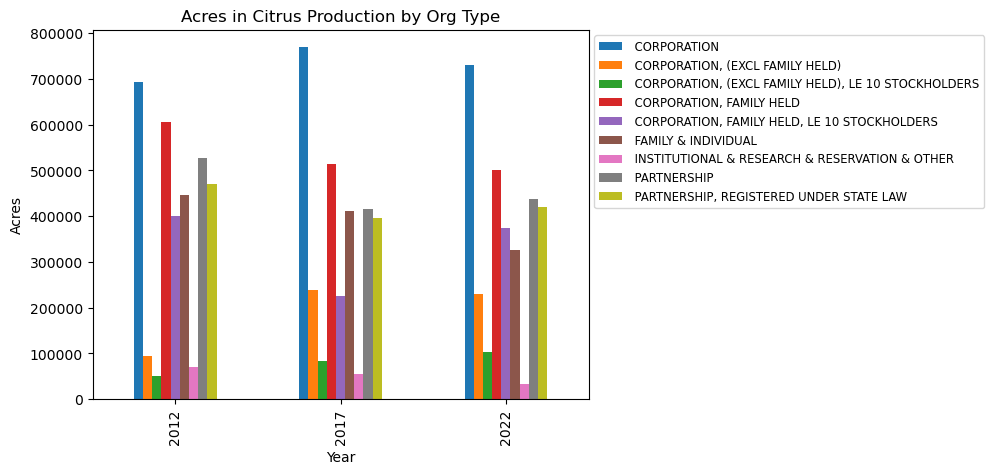

In [26]:
demo_citrus_area_graph = demo_citrus_area.plot(x = 'Year', y = list(
    demo_citrus['Domain Category'].loc[(demo_citrus['Domain'] == 'ORGANIZATION')].unique()), kind = "bar", title = "Acres in Citrus Production by Org Type",
                                              ylabel = "Acres").legend(
    bbox_to_anchor = (1.0,1.0),
    fontsize = 'small').get_figure()
demo_citrus_area_graph.savefig('demo_citrus_area_graph.png', transparent=True, bbox_inches='tight')

In [27]:
demo_fruitnut = demo_fruitnut.loc[demo_fruitnut['Value'] != ' (D)']
demo_fruitnut = demo_fruitnut.loc[demo_fruitnut['Value'] != ' (Z)']
demo_fruitnut['Value'] = demo_fruitnut['Value'].str.replace(',', '')
demo_fruitnut['Value'] = pd.to_numeric(demo_fruitnut.Value, downcast='integer').fillna(0)
demo_fruitnut

,Program,Year,Period,Week Ending,Geo Level,State,State ANSI,Ag District,Ag District Code,County,...,Zip Code,Region,watershed_code,Watershed,Commodity,Data Item,Domain,Domain Category,Value,CV (%)
0,CENSUS,2022,YEAR,NaN,NATIONAL,US TOTAL,NaN,NaN,NaN,NaN,...,NaN,NaN,0,NaN,FRUIT & TREE NUT TOTALS,FRUIT & TREE NUT TOTALS - OPERATIONS WITH SALES,ORGANIZATION,"ORGANIZATION: (TAX PURPOSES, CORPORATION)",14952,4.1
1,CENSUS,2022,YEAR,NaN,NATIONAL,US TOTAL,NaN,NaN,NaN,NaN,...,NaN,NaN,0,NaN,FRUIT & TREE NUT TOTALS,FRUIT & TREE NUT TOTALS - OPERATIONS WITH SALES,ORGANIZATION,"ORGANIZATION: (TAX PURPOSES, CORPORATION, (EXC...",2409,5.2
2,CENSUS,2022,YEAR,NaN,NATIONAL,US TOTAL,NaN,NaN,NaN,NaN,...,NaN,NaN,0,NaN,FRUIT & TREE NUT TOTALS,FRUIT & TREE NUT TOTALS - OPERATIONS WITH SALES,ORGANIZATION,"ORGANIZATION: (TAX PURPOSES, CORPORATION, (EXC...",2170,4.9
3,CENSUS,2022,YEAR,NaN,NATIONAL,US TOTAL,NaN,NaN,NaN,NaN,...,NaN,NaN,0,NaN,FRUIT & TREE NUT TOTALS,FRUIT & TREE NUT TOTALS - OPERATIONS WITH SALES,ORGANIZATION,"ORGANIZATION: (TAX PURPOSES, CORPORATION, FAMI...",12543,4.0
4,CENSUS,2022,YEAR,NaN,NATIONAL,US TOTAL,NaN,NaN,NaN,NaN,...,NaN,NaN,0,NaN,FRUIT & TREE NUT TOTALS,FRUIT & TREE NUT TOTALS - OPERATIONS WITH SALES,ORGANIZATION,"ORGANIZATION: (TAX PURPOSES, CORPORATION, FAMI...",12234,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29704,CENSUS,2012,YEAR,NaN,STATE,WYOMING,56.0,NaN,NaN,NaN,...,NaN,NaN,0,NaN,FRUIT & TREE NUT TOTALS,"FRUIT & TREE NUT TOTALS, (EXCL BERRIES) - OPER...",TYPOLOGY,"TYPOLOGY: (FAMILY FARMS, GCFI (LESS THAN 350,0...",16,20.5
29705,CENSUS,2012,YEAR,NaN,STATE,WYOMING,56.0,NaN,NaN,NaN,...,NaN,NaN,0,NaN,FRUIT & TREE NUT TOTALS,"FRUIT & TREE NUT TOTALS, (EXCL BERRIES) - OPER...",TYPOLOGY AND SALES,"TYPOLOGY: (FAMILY FARMS, GCFI (LESS THAN 350,0...",1,6.8
29706,CENSUS,2012,YEAR,NaN,STATE,WYOMING,56.0,NaN,NaN,NaN,...,NaN,NaN,0,NaN,FRUIT & TREE NUT TOTALS,"FRUIT & TREE NUT TOTALS, (EXCL BERRIES) - SALE...",OPERATORS,OPERATORS: (1 OPERATORS),92000,79.6
29727,CENSUS,2012,YEAR,NaN,STATE,WYOMING,56.0,NaN,NaN,NaN,...,NaN,NaN,0,NaN,FRUIT & TREE NUT TOTALS,"FRUIT & TREE NUT TOTALS, (EXCL BERRIES) - SALE...",ORGANIZATION,"ORGANIZATION: (TAX PURPOSES, FAMILY & INDIVIDUAL)",222000,34.8


In [28]:
demo_fruitnut['Data Item'].loc[(demo_fruitnut['Domain'] == 'ORGANIZATION')].unique()

array(['FRUIT & TREE NUT TOTALS - OPERATIONS WITH SALES',
       'FRUIT & TREE NUT TOTALS - SALES, MEASURED IN $',
       'FRUIT & TREE NUT TOTALS, (EXCL BERRIES) - OPERATIONS WITH SALES',
       'FRUIT & TREE NUT TOTALS, (EXCL BERRIES) - SALES, MEASURED IN $'],
      dtype=object)

In [29]:
demo_fruitnut['Domain Category'] = demo_fruitnut['Domain Category'].str[28:-1]

In [30]:
demo_fruitnut_sales = demo_fruitnut.loc[(demo_fruitnut['Domain'] == 'ORGANIZATION')
                & (demo_fruitnut['Data Item'] == 'FRUIT & TREE NUT TOTALS - SALES, MEASURED IN $')].groupby(
                ['Year', 'Domain Category']).sum(
                'Value').fillna(0).reset_index()
demo_fruitnut_sales

,Year,Domain Category,Week Ending,State ANSI,Ag District,Ag District Code,County,County ANSI,Zip Code,Region,watershed_code,Watershed,Value
0,2012,CORPORATION,0.0,1133.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,20524897000
1,2012,"CORPORATION, (EXCL FAMILY HELD)",0.0,762.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,3714561000
2,2012,"CORPORATION, (EXCL FAMILY HELD), LE 10 STOCKH...",0.0,477.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,2437432000
3,2012,"CORPORATION, FAMILY HELD",0.0,1059.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,16805514000
4,2012,"CORPORATION, FAMILY HELD, LE 10 STOCKHOLDERS",0.0,618.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,13835401000
5,2012,FAMILY & INDIVIDUAL,0.0,1230.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,14746128000
6,2012,INSTITUTIONAL & RESEARCH & RESERVATION & OTHER,0.0,1044.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,1885046000
7,2012,PARTNERSHIP,0.0,1146.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,14185736000
8,2012,"PARTNERSHIP, REGISTERED UNDER STATE LAW",0.0,982.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,12967652000
9,2017,CORPORATION,0.0,1234.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,23148037000


In [31]:
demo_fruitnut_sales = demo_fruitnut_sales.pivot(index = 'Year', columns = 'Domain Category', values = 'Value').reset_index()
demo_fruitnut_sales

Domain Category,Year,CORPORATION,"CORPORATION, (EXCL FAMILY HELD)","CORPORATION, (EXCL FAMILY HELD), LE 10 STOCKHOLDERS","CORPORATION, FAMILY HELD","CORPORATION, FAMILY HELD, LE 10 STOCKHOLDERS",FAMILY & INDIVIDUAL,INSTITUTIONAL & RESEARCH & RESERVATION & OTHER,PARTNERSHIP,"PARTNERSHIP, REGISTERED UNDER STATE LAW"
0,2012,20524897000,3714561000,2437432000,16805514000,13835401000,14746128000,1885046000,14185736000,12967652000
1,2017,23148037000,3975922000,2536098000,19101229000,16432355000,15876822000,1709791000,16360729000,14236551000
2,2022,28222425000,6387641000,4052259000,21845730000,18968813000,17482732000,899870000,21696455000,20646681000


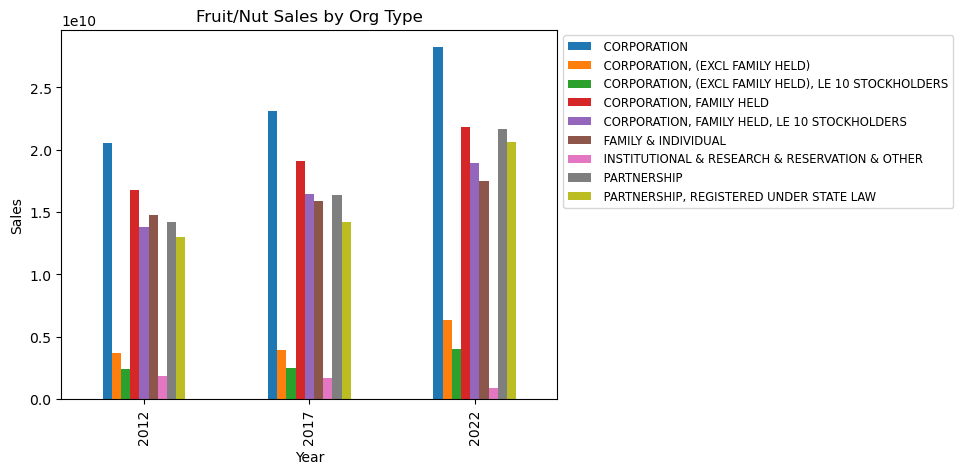

In [32]:
fruit_sales_demo_graph = demo_fruitnut_sales.plot(x = 'Year', y = list(
    demo_fruitnut['Domain Category'].loc[(demo_fruitnut['Domain'] == 'ORGANIZATION')].unique()), kind = "bar", title = "Fruit/Nut Sales by Org Type",
                                                 ylabel = "Sales").legend(
    bbox_to_anchor = (1.0,1.0),
    fontsize = 'small').get_figure()

In [33]:
fruit_sales_demo_graph.savefig('fruit_sales_demo_graph.png', transparent=True, bbox_inches='tight')

In [34]:
demo_citrus['Domain'].unique()

array(['ORGANIZATION', 'PRODUCERS', 'TENURE', 'TYPOLOGY', 'OPERATORS',
       'OPERATORS, PRINCIPAL',
       'OPERATORS, PRINCIPAL, ON PRESENT OPERATION'], dtype=object)

In [35]:
demo_berries['Domain'].unique()

array(['ORGANIZATION', 'PRODUCERS', 'TENURE', 'ORGANIZATION AND SALES',
       'PRODUCERS AND SALES', 'TENURE AND SALES', 'TYPOLOGY',
       'TYPOLOGY AND SALES', 'OPERATORS', 'OPERATORS, PRINCIPAL',
       'OPERATORS, PRINCIPAL, ON PRESENT OPERATION',
       'OPERATORS AND SALES', 'OPERATORS, PRINCIPAL AND SALES',
       'OPERATORS, PRINCIPAL, ON PRESENT OPERATION AND SALES'],
      dtype=object)

In [36]:
all_commoditites = pd.read_csv('../data/commodity_totals.csv')

In [37]:
comm_income_by_size = all_commoditites.loc[all_commoditites['Domain'] == 'AREA OPERATED']
comm_income_by_size

,Program,Year,Period,Week Ending,Geo Level,State,State ANSI,Ag District,Ag District Code,County,...,Zip Code,Region,watershed_code,Watershed,Commodity,Data Item,Domain,Domain Category,Value,CV (%)
0,CENSUS,2022,YEAR,NaN,NATIONAL,US TOTAL,NaN,NaN,NaN,NaN,...,NaN,NaN,0,NaN,COMMODITY TOTALS,"COMMODITY TOTALS - SALES, MEASURED IN $",AREA OPERATED,"AREA OPERATED: (1,000 TO 1,999 ACRES)","88,929,938,000",4.4
1,CENSUS,2022,YEAR,NaN,NATIONAL,US TOTAL,NaN,NaN,NaN,NaN,...,NaN,NaN,0,NaN,COMMODITY TOTALS,"COMMODITY TOTALS - SALES, MEASURED IN $",AREA OPERATED,AREA OPERATED: (1.0 TO 9.9 ACRES),"12,319,047,000",6.1
2,CENSUS,2022,YEAR,NaN,NATIONAL,US TOTAL,NaN,NaN,NaN,NaN,...,NaN,NaN,0,NaN,COMMODITY TOTALS,"COMMODITY TOTALS - SALES, MEASURED IN $",AREA OPERATED,AREA OPERATED: (10.0 TO 49.9 ACRES),"37,885,890,000",4.7
3,CENSUS,2022,YEAR,NaN,NATIONAL,US TOTAL,NaN,NaN,NaN,NaN,...,NaN,NaN,0,NaN,COMMODITY TOTALS,"COMMODITY TOTALS - SALES, MEASURED IN $",AREA OPERATED,AREA OPERATED: (100 TO 139 ACRES),"17,647,826,000",4.0
4,CENSUS,2022,YEAR,NaN,NATIONAL,US TOTAL,NaN,NaN,NaN,NaN,...,NaN,NaN,0,NaN,COMMODITY TOTALS,"COMMODITY TOTALS - SALES, MEASURED IN $",AREA OPERATED,AREA OPERATED: (140 TO 179 ACRES),"16,342,424,000",4.1
5,CENSUS,2022,YEAR,NaN,NATIONAL,US TOTAL,NaN,NaN,NaN,NaN,...,NaN,NaN,0,NaN,COMMODITY TOTALS,"COMMODITY TOTALS - SALES, MEASURED IN $",AREA OPERATED,AREA OPERATED: (180 TO 219 ACRES),"13,220,995,000",2.4
6,CENSUS,2022,YEAR,NaN,NATIONAL,US TOTAL,NaN,NaN,NaN,NaN,...,NaN,NaN,0,NaN,COMMODITY TOTALS,"COMMODITY TOTALS - SALES, MEASURED IN $",AREA OPERATED,"AREA OPERATED: (2,000 OR MORE ACRES)","184,575,378,000",2.9
7,CENSUS,2022,YEAR,NaN,NATIONAL,US TOTAL,NaN,NaN,NaN,NaN,...,NaN,NaN,0,NaN,COMMODITY TOTALS,"COMMODITY TOTALS - SALES, MEASURED IN $",AREA OPERATED,AREA OPERATED: (220 TO 259 ACRES),"10,481,235,000",4.1
8,CENSUS,2022,YEAR,NaN,NATIONAL,US TOTAL,NaN,NaN,NaN,NaN,...,NaN,NaN,0,NaN,COMMODITY TOTALS,"COMMODITY TOTALS - SALES, MEASURED IN $",AREA OPERATED,AREA OPERATED: (260 TO 499 ACRES),"53,035,405,000",2.1
9,CENSUS,2022,YEAR,NaN,NATIONAL,US TOTAL,NaN,NaN,NaN,NaN,...,NaN,NaN,0,NaN,COMMODITY TOTALS,"COMMODITY TOTALS - SALES, MEASURED IN $",AREA OPERATED,AREA OPERATED: (50.0 TO 69.9 ACRES),"12,310,114,000",3.8


In [38]:
comm_income_by_size = comm_income_by_size.loc[comm_income_by_size['Value'] != ' (D)']
comm_income_by_size = comm_income_by_size.loc[comm_income_by_size['Value'] != ' (Z)']
comm_income_by_size['Value'] = comm_income_by_size['Value'].str.replace(',', '')
comm_income_by_size['Value'] = pd.to_numeric(comm_income_by_size.Value, downcast='integer').fillna(0)

In [39]:
comm_income_by_size = comm_income_by_size.groupby(
                ['Year','Domain Category']).sum(
                'Value').fillna(0).reset_index()
comm_income_by_size

,Year,Domain Category,Week Ending,State ANSI,Ag District,Ag District Code,County,County ANSI,Zip Code,Region,watershed_code,Watershed,Value,CV (%)
0,2012,"AREA OPERATED: (1,000 TO 1,999 ACRES)",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,72422104000,1.9
1,2012,AREA OPERATED: (1.0 TO 9.9 ACRES),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,7440534000,2.1
2,2012,AREA OPERATED: (10.0 TO 49.9 ACRES),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,23467130000,1.4
3,2012,AREA OPERATED: (100 TO 139 ACRES),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,12036659000,2.5
4,2012,AREA OPERATED: (140 TO 179 ACRES),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,11898914000,2.9
5,2012,AREA OPERATED: (180 TO 219 ACRES),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,9539131000,3.4
6,2012,"AREA OPERATED: (2,000 OR MORE ACRES)",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,122922240000,1.7
7,2012,AREA OPERATED: (220 TO 259 ACRES),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,9037393000,6.2
8,2012,AREA OPERATED: (260 TO 499 ACRES),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,41345055000,4.6
9,2012,AREA OPERATED: (50.0 TO 69.9 ACRES),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,8295867000,1.4


In [40]:
comm_income_by_size['Domain Category'] = comm_income_by_size['Domain Category'].str[16:-1]

In [41]:
comm_income_by_size.sort_values('Domain Category', ascending = False)

,Year,Domain Category,Week Ending,State ANSI,Ag District,Ag District Code,County,County ANSI,Zip Code,Region,watershed_code,Watershed,Value,CV (%)
35,2022,70.0 TO 99.9 ACRES,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,16728969000,5.8
11,2012,70.0 TO 99.9 ACRES,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,11270946000,2.3
23,2017,70.0 TO 99.9 ACRES,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,12286283000,2.7
34,2022,500 TO 999 ACRES,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,79609944000,2.6
10,2012,500 TO 999 ACRES,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,64968508000,3.2
22,2017,500 TO 999 ACRES,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,59700336000,1.6
33,2022,50.0 TO 69.9 ACRES,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,12310114000,3.8
9,2012,50.0 TO 69.9 ACRES,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,8295867000,1.4
21,2017,50.0 TO 69.9 ACRES,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,8985783000,2.9
32,2022,260 TO 499 ACRES,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,53035405000,2.1


In [42]:
comm_income_by_size_piv = comm_income_by_size.pivot(index = 'Year', columns = 'Domain Category', values = 'Value').reset_index()
comm_income_by_size_piv

Domain Category,Year,"1,000 TO 1,999 ACRES",1.0 TO 9.9 ACRES,10.0 TO 49.9 ACRES,100 TO 139 ACRES,140 TO 179 ACRES,180 TO 219 ACRES,"2,000 OR MORE ACRES",220 TO 259 ACRES,260 TO 499 ACRES,50.0 TO 69.9 ACRES,500 TO 999 ACRES,70.0 TO 99.9 ACRES
0,2012,72422104000,7440534000,23467130000,12036659000,11898914000,9539131000,122922240000,9037393000,41345055000,8295867000,64968508000,11270946000
1,2017,68443433000,7824714000,24879848000,12709110000,11658818000,10270858000,123057529000,8437582000,40268401000,8985783000,59700336000,12286283000
2,2022,88929938000,12319047000,37885890000,17647826000,16342424000,13220995000,184575378000,10481235000,53035405000,12310114000,79609944000,16728969000


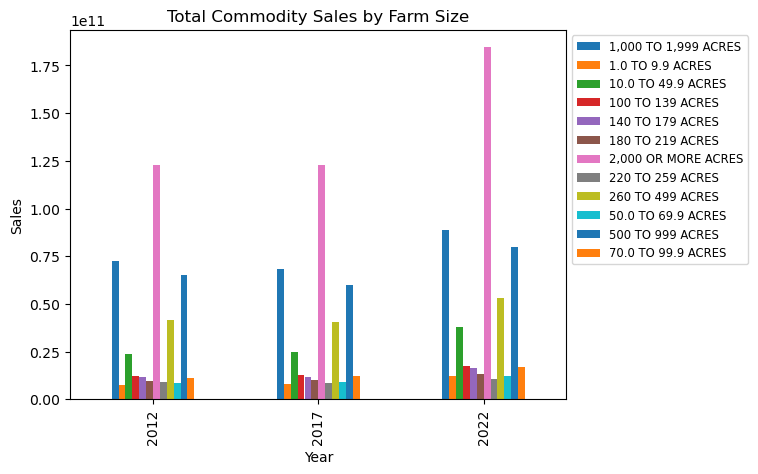

In [43]:
comm_income_by_size_plot = comm_income_by_size_piv.plot(x = 'Year', y = list(
    comm_income_by_size['Domain Category'].unique()), kind = "bar", title = "Total Commodity Sales by Farm Size",
                                                 ylabel = "Sales").legend(
    bbox_to_anchor = (1.0,1.0),
    fontsize = 'small').get_figure()

In [94]:
comm_income_by_size_plot.savefig('comm_income_by_size_plot.png', transparent=True, bbox_inches='tight')

In [44]:
list(comm_income_by_size['Domain Category'].unique())

['1,000 TO 1,999 ACRES',
 '1.0 TO 9.9 ACRES',
 '10.0 TO 49.9 ACRES',
 '100 TO 139 ACRES',
 '140 TO 179 ACRES',
 '180 TO 219 ACRES',
 '2,000 OR MORE ACRES',
 '220 TO 259 ACRES',
 '260 TO 499 ACRES',
 '50.0 TO 69.9 ACRES',
 '500 TO 999 ACRES',
 '70.0 TO 99.9 ACRES']

In [45]:
demo_vegetables['Data Item'].unique()

array(['VEGETABLE TOTALS, IN THE OPEN - ACRES HARVESTED',
       'VEGETABLE TOTALS, IN THE OPEN - ACRES IN PRODUCTION',
       'VEGETABLE TOTALS, IN THE OPEN - OPERATIONS WITH AREA IN PRODUCTION',
       'VEGETABLE TOTALS, IN THE OPEN, IRRIGATED - ACRES IN PRODUCTION',
       'VEGETABLE TOTALS, IN THE OPEN, IRRIGATED - OPERATIONS WITH AREA IN PRODUCTION',
       'VEGETABLE TOTALS, INCL SEEDS & TRANSPLANTS, IN THE OPEN - OPERATIONS WITH SALES',
       'VEGETABLE TOTALS, INCL SEEDS & TRANSPLANTS, IN THE OPEN - SALES, MEASURED IN $',
       'VEGETABLE TOTALS - ACRES IN PRODUCTION',
       'VEGETABLE TOTALS - OPERATIONS WITH AREA IN PRODUCTION',
       'VEGETABLE TOTALS, INCL SEEDS & TRANSPLANTS - OPERATIONS WITH SALES',
       'VEGETABLE TOTALS, INCL SEEDS & TRANSPLANTS - SALES, MEASURED IN $',
       'VEGETABLE TOTALS, IN THE OPEN - OPERATIONS WITH AREA HARVESTED'],
      dtype=object)

In [46]:
demo_vegetables['Domain Category'].loc[demo_vegetables['Data Item'] == 'VEGETABLE TOTALS, IN THE OPEN - OPERATIONS WITH AREA IN PRODUCTION'].unique()

array([' CORPORATION', ' CORPORATION, (EXCL FAMILY HELD)',
       ' CORPORATION, (EXCL FAMILY HELD), LE 10 STOCKHOLDERS',
       ' CORPORATION, FAMILY HELD',
       ' CORPORATION, FAMILY HELD, LE 10 STOCKHOLDERS',
       ' FAMILY & INDIVIDUAL',
       ' INSTITUTIONAL & RESEARCH & RESERVATION & OTHER', ' PARTNERSHIP',
       ' PARTNERSHIP, REGISTERED UNDER STATE LAW',
       ' CORPORATION) AND AREA IN PRODUCTION: (0.1 TO 4.9 ACRES',
       ' CORPORATION) AND AREA IN PRODUCTION: (100 TO 249 ACRES',
       ' CORPORATION) AND AREA IN PRODUCTION: (25.0 TO 99.9 ACRES',
       ' CORPORATION) AND AREA IN PRODUCTION: (250 OR MORE ACRES',
       ' CORPORATION) AND AREA IN PRODUCTION: (5.0 TO 24.9 ACRES',
       ' CORPORATION, (EXCL FAMILY HELD)) AND AREA IN PRODUCTION: (0.1 TO 4.9 ACRES',
       ' CORPORATION, (EXCL FAMILY HELD)) AND AREA IN PRODUCTION: (100 TO 249 ACRES',
       ' CORPORATION, (EXCL FAMILY HELD)) AND AREA IN PRODUCTION: (25.0 TO 99.9 ACRES',
       ' CORPORATION, (EXCL FAMILY H